In [2]:
pip install ollama

In [4]:
import ollama
ollama.pull('mistral')

ProgressResponse(status='success', completed=None, total=None, digest=None)

In [5]:
ollama.list()

ListResponse(models=[Model(model='mistral:latest', modified_at=datetime.datetime(2026, 2, 6, 16, 27, 12, 606635, tzinfo=TzInfo(+05:30)), digest='6577803aa9a036369e481d648a2baebb381ebc6e897f2bb9a766a2aa7bfbc1cf', size=4372824384, details=ModelDetails(parent_model='', format='gguf', family='llama', families=['llama'], parameter_size='7.2B', quantization_level='Q4_K_M')), Model(model='gemma3:270m', modified_at=datetime.datetime(2026, 1, 28, 21, 50, 10, 228761, tzinfo=TzInfo(+05:30)), digest='e7d36fb2c3b3293cfe56d55889867a064b3a2b22e98335f2e6e8a387e081d6be', size=291554930, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'], parameter_size='268.10M', quantization_level='Q8_0'))])

In [8]:
import ollama

q = "How can Large Language Models be used in engineering?"

response = ollama.generate(
    model="mistral",
    prompt=q
)

print(response["response"])


 Large Language Models (LLMs) can be applied in various areas of engineering, enhancing efficiency, accuracy, and automation in several ways:

1. **Automated Documentation**: LLMs can generate technical documentation like manuals, reports, or project summaries based on input data, freeing up engineers' time for other tasks.

2. **Code Generation**: LLMs can assist with writing code by providing suggestions, explaining complex programming concepts, or even generating entire sections of code. This can help speed up development and reduce errors.

3. **Design Optimization**: LLMs can be used to optimize engineering designs using reinforcement learning techniques. They can learn from large datasets of successful designs to suggest improved solutions for various engineering problems.

4. **Predictive Maintenance**: By analyzing sensor data, LLMs can predict when maintenance is required on machinery or equipment. This proactive approach reduces downtime and increases efficiency.

5. **Troubl

In [9]:
import ollama
prompt1 = 'What is the capital of France?'
response = ollama.chat(model='mistral', messages=[
            {'role': 'user','content': prompt1,},])
r1 = response['message']['content']
print(r1)

prompt2 = 'and of Germany?'
response = ollama.chat(model='mistral', messages=[
            {'role': 'user','content': prompt1,},
            {'role': 'assistant','content': r1,},            
            {'role': 'user','content': prompt2,},])
r2 = response['message']['content']
print(r2)

 The capital of France is Paris. It's one of the most famous cities in the world, known for its landmarks such as the Eiffel Tower, Louvre Museum, and Notre-Dame Cathedral.
 The capital of Germany is Berlin. Berlin is rich in history, culture, and modern attractions. Some popular places to visit include the Brandenburg Gate, Reichstag Building, and Checkpoint Charlie. It is also home to a diverse range of museums and vibrant nightlife.


In [12]:
import ollama
prompt = 'Futures most 5 trending tech domain which would have immense demand of jobs?'
stream = ollama.chat(model='mistral',
          messages=[{'role': 'user', 'content': prompt}],
          stream=True,)
for chunk in stream:
  print(chunk['message']['content'], end='', flush=True)

 1. Artificial Intelligence (AI) and Machine Learning (ML): AI and ML technologies are being integrated into various industries, from healthcare to finance, creating a high demand for professionals with expertise in these areas. Jobs include AI engineers, data scientists, ML engineers, and AI research scientists.

2. Cybersecurity: With the increasing reliance on digital platforms and the internet of things (IoT), cybersecurity is becoming increasingly important. Professionals skilled in areas such as network security, cloud security, and ethical hacking are in high demand.

3. Cloud Computing: As more businesses move their operations to the cloud, there is a growing need for cloud architects, cloud engineers, and DevOps specialists. These roles involve designing, deploying, and managing cloud-based solutions.

4. Blockchain Technology: Blockchain technology, best known for its use in cryptocurrencies like Bitcoin, has potential applications beyond finance. It offers transparency, secu

Model: phi, Time: 7.4680693s
Model: mistral, Time: 44.6680695s
Model: gemma, Time: 68.8362136s
Model: phi+ctx, Time: 4.9710703s
Model: mistral+ctx, Time: 31.778966s
Model: gemma+ctx, Time: 59.0366357s
             total_duration  load_duration  prompt_eval_count  eval_count  \
phi                7.468069       4.032055                 53         315   
mistral           44.668070       7.278302                 29         517   
gemma             68.836214      11.835043                 43         409   
phi+ctx            4.971070       3.724886                237         103   
mistral+ctx       31.778966       6.976965                223         364   
gemma+ctx         59.036636      10.232985                221         324   

             prompt_eval_duration  eval_duration  calc_duration  prompt_rate  \
phi                      0.031548       2.428358       3.436015  1679.995689   
mistral                  0.716814      36.535674      37.389768    40.456777   
gemma              

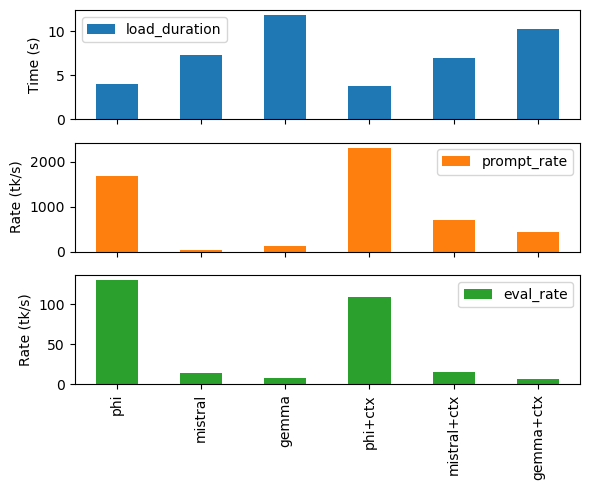

In [14]:
import ollama
import pandas as pd
import matplotlib.pyplot as plt

# question
q = '''How can data science techniques improve predictive maintenance 
of rotating equipment such as pumps and turbines?'''

# context
cntx = '''In engineering, particularly in industries such as manufacturing, 
transportation, and energy, machinery and equipment are crucial assets. 
These assets require regular maintenance to ensure optimal performance 
and to prevent unexpected breakdowns, which can be costly and disruptive. 
Traditional maintenance strategies often rely on scheduled maintenance 
routines or responding to equipment failures as they occur. However, 
with the advancement of data science techniques such as machine learning 
and predictive analytics, engineers can now predict when a machine is 
likely to fail or require maintenance. This approach, known as predictive 
maintenance, uses historical data, sensor data, and algorithms to identify 
patterns and predict potential issues before they happen. The implementation 
of these data science techniques in engineering maintenance can lead to 
more efficient use of resources, reduced downtime, and potentially 
significant cost savings.'''

# models
models = ['phi','mistral','gemma'] #,'mixtral']

# store results 
r = []
idx = []
# prompt without context
pmpt = f'Question: {q}'
for i,mx in enumerate(models):
    r.append(ollama.generate(model=mx, prompt=pmpt))
    idx.append(mx)
    print(f"Model: {idx[-1]}, Time: {r[-1]['total_duration']/1e9}s")

# prompt with context
pmpt = f'Context: {cntx} Question: {q}'
for i,mx in enumerate(models):
    r.append(ollama.generate(model=mx, prompt=pmpt))
    idx.append(mx+'+ctx')
    print(f"Model: {idx[-1]}, Time: {r[-1]['total_duration']/1e9}s")

# put results in DataFrame
rcols = ['total_duration','load_duration',
         'prompt_eval_count','eval_count',
         'prompt_eval_duration','eval_duration']
data = {}
for i,x in enumerate(rcols):
    if (i==2) or (i==3):
        data[x] = [ri[x] for ri in r]
    else:
        data[x] = [ri[x]/1e9 for ri in r]
data = pd.DataFrame(data, index=idx)
data['calc_duration'] = data['total_duration']-data['load_duration']
data['prompt_rate'] = data['prompt_eval_count']/data['prompt_eval_duration']
data['eval_rate'] = data['eval_count']/data['eval_duration']
print(data)

pcols = ['load_duration','prompt_rate','eval_rate']
axs = data[pcols].plot(figsize=(6,5),kind='bar',subplots=True)
ylb = ['Time (s)','Rate (tk/s)','Rate (tk/s)']
for i,ax in enumerate(axs):
    ax.set_title('')
    ax.set_ylabel(ylb[i])
plt.tight_layout(); plt.savefig('results.png',dpi=300); plt.show()